# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

# Цель проекта

Провести анализ и подготовить план действий по удержанию клиентов. А именно:

1. Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2. Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3. Проанализировать основные признаки, наиболее сильно влияющие на отток;
4. Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    - Выделить целевые группы клиентов;
    - Предложить меры по снижению оттока;
    - Определить другие особенности взаимодействия с клиентами.

# Описание данных

Путь к файлу: /datasets/gym_churn.csv. Скачать датасет

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля: 'Churn' — факт оттока в текущем месяце;
1. Текущие поля в датасете: Данные клиента за предыдущий до проверки факта оттока месяц:

    * 'gender' — пол;
    * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
    * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * 'Phone' — наличие контактного телефона;
    * 'Age' — возраст;
    * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

2. Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

    * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    * 'Group_visits' — факт посещения групповых занятий;
    * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Содержание

1. [Загружаем данные и готовим их к анализу](#Загружаем-данные-и-готовим-их-к-анализу)
2. [Предобработка данных](#Предобработка-данных)
3. [Проведем исследовательский анализ данных (EDA)](#Проведем-исследовательский-анализ-данных-(EDA))
    * [Рассмотрим датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения](#Рассмотрим-датасет:-есть-ли-в-нем-отсутствующие-признаки,-изучим-средние-значения-и-стандартные-отклонения) 
    * [Рассмотрим средние значения признаков в двух группах: тех, кто ушел в отток и тех, кто остался](#Рассмотрим-средние-значения-признаков-в-двух-группах:-тех,-кто-ушел-в-отток-и-тех,-кто-остался)
    * [Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#Построим-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток))
    * [Построим матрицу корреляций и отобразите её](#Построим-матрицу-корреляций-и-отобразите-её) 
4. [Построим модель прогнозирования оттока клиентов](#Построим-модель-прогнозирования-оттока-клиентов)
5. [Сделаем кластеризацию клиентов](#Сделаем-кластеризацию-клиентов)
    * [Стандартизация данных](#Стандартизация-данных)
    * [Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов](#Обучим-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируем-кластеры-клиентов)
    * [Посмотрим на средние значения признаков для кластеров и построим графики распределения для признаков](#Посмотрим-на-средние-значения-признаков-для-кластеров-и-построим-графики-распределения-для-признаков)
6. [Общий вывод](#Общий-вывод)

<a id="some_id"></a> 
## Загружаем данные и готовим их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

Для отображения в jupiter всех колонок и столбцов df + сокращу количество цифр после запятой.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision',2)

In [3]:
gym = pd.read_csv('/datasets/gym_churn.csv')

# Промежуточный вывод

Данные загружены и подготовлены.
<a id="some_id"></a> 
## Предобработка данных
<a id="some_id"></a> 
Рассмотрим выборку описательной статистики и самой информации о датасетe

In [4]:
display(gym.head())
display(gym.info())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.0,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.0,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.0,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.0,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.0,3,1.11,1.12,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

Пропусков не имеется и типы данных впорядке. Необходимо изменить данные по некоторым столбцам:
- необходимо изменить регистр,
- изменить порядок столбцов для удобства

In [5]:
gym.columns = gym.columns.str.lower()

In [6]:
gym.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [7]:
gym = gym[['gender',
         'near_location',
         'partner',
         'promo_friends',
         'phone',
         'group_visits',
         'age',
         'avg_additional_charges_total',
         'contract_period',
         'month_to_end_contract',
         'lifetime',
         'avg_class_frequency_total',
         'avg_class_frequency_current_month',
         'churn']]

In [8]:
gym.sample(10)

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,contract_period,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2975,0,0,1,0,1,0,27,318.76,6,6.0,10,2.78,2.67,0
3675,0,1,0,0,1,0,29,88.05,1,1.0,0,1.57,0.62,1
976,0,1,0,0,1,1,32,290.05,12,11.0,12,2.19,2.20,0
573,1,1,0,0,1,0,28,265.68,1,1.0,1,1.32,1.27,0
2597,0,1,0,0,1,1,37,90.79,1,1.0,4,3.55,3.58,0
1576,0,0,1,0,1,1,29,161.04,1,1.0,1,1.53,1.63,0
1164,0,1,1,1,1,1,30,203.43,1,1.0,5,1.21,1.32,0
2220,0,0,0,0,1,0,27,374.09,6,5.0,1,1.48,0.57,1
2565,0,1,1,1,1,0,35,196.44,6,6.0,3,0.62,0.65,0
1627,0,1,1,1,1,0,29,281.54,12,12.0,2,1.75,1.78,0


In [9]:
print('Количество дублирующих значений:', gym.duplicated().sum())

Количество дублирующих значений: 0


# Промежуточный вывод

Данные подготовлены к анализу. Был изменен порядок столбцов для удоства и логичности (бинарные признаки рядом с бинарными). Дублирующие значения отсутвуют.

<a id="some_id"></a> 
## Проведем исследовательский анализ данных (EDA)
<a id="some_id"></a> 
### Рассмотрим датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [10]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,contract_period,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.00,4000.00,4000.00,4000.00,4000.0,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00,4000.00
mean,0.51,0.85,0.49,0.31,0.9,0.41,29.18,146.94,4.68,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.3,0.49,3.26,96.36,4.55,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.0,0.00,18.00,0.15,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.0,0.00,27.00,68.87,1.00,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.0,0.00,29.00,136.22,1.00,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.0,1.00,31.00,210.95,6.00,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.0,1.00,41.00,552.59,12.00,12.00,31.00,6.02,6.15,1.00


# Промежуточный вывод

Разделение по гендерному признаку практически поровну, с небольшим преимуществом пола под цифрой 1 (примечательно, что мы не знаем, что значит 0, что единица). Большинство клиентов находятся рядом с фитнес-центром. Почти половина клиентов являются сотрудниками компаний партнеров.

31% клиентов были приведены по акции "Приведи друга". Телефон указан у большиснтва клиентов (90%). Средняя длительность абонемента составляет 4,68 месяцев. Медианное значение равняется 1 месяцу. Тем самым можно заключить, что превалирует большая часть клиентов у которых абонимент на 1 месяц. 41% клиентов посещали групповые занятия. Средний возраст клентов составляет 29 лет. 

В среднем фитнес-центр зарабатывает 146.94 уе с клиента по мимо стоимости абонемента. В среднем наши клиенты с нами около 4 месяцев, медианное значение - 3 месяца. Средняя частота посещений в неделю за прошлый месяц составляет 1.88. Средняя частота посещений в неделю за все время практически одинаковая как и за прошлый месяц, 1.77. Видимо эти два параметра будут сильно коррелировать.

Факт оттока настораживает, средняя - 27%, то есть в прошлом месяце потеряли чуть больше четверти клиентов. Касательно стандартного отклонения, в наблюдениях где медианное значение сильно отличалось от среднего (срок абонемента и т.п.) так же отмечается большой разброс.

### Рассмотрим средние значения признаков в двух группах: тех, кто ушел в отток и тех, кто остался 

In [11]:
gym.groupby('churn').mean().T

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
contract_period,5.75,1.73
month_to_end_contract,5.28,1.66


# Промежуточный вывод

В первую очередь следует отметить - чем больше клиента связывает с фитнес-центром, тем больше шансов, что он не уйдет. Среди оставшихся средние значения по всем параметрам (кроме пола) выше, чем у тех, кто ушел. Например, это клиенты которых связывают партнерские отношения, у которых длительные абонементы, посещающие группые занятия и которые в принципе уже не первый месяц посещают фитнес. Также можно сказать, что пол и наличие телефона, по всей видимости, практически не влияют на отток. Проясняется задача, фитнес-центру нужно удержать клиента в течение первого месяца. Судя по всему, этот месяц критичен.


### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
Подробнее изучим признаки, построив ряд графиков. Разобьем посетителей на две таблицы, которые ушли и не ушли. И выделим бинарные и количественные признаки в списки.

In [12]:
gym_churn = gym.loc[gym['churn'] == 1]
gym_no_churn = gym.loc[gym['churn'] == 0]

In [13]:
binary_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
quantitive_features = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

Построим гистограммы для каждого из бинарных признаков, сравним ушедших и оставшихся.

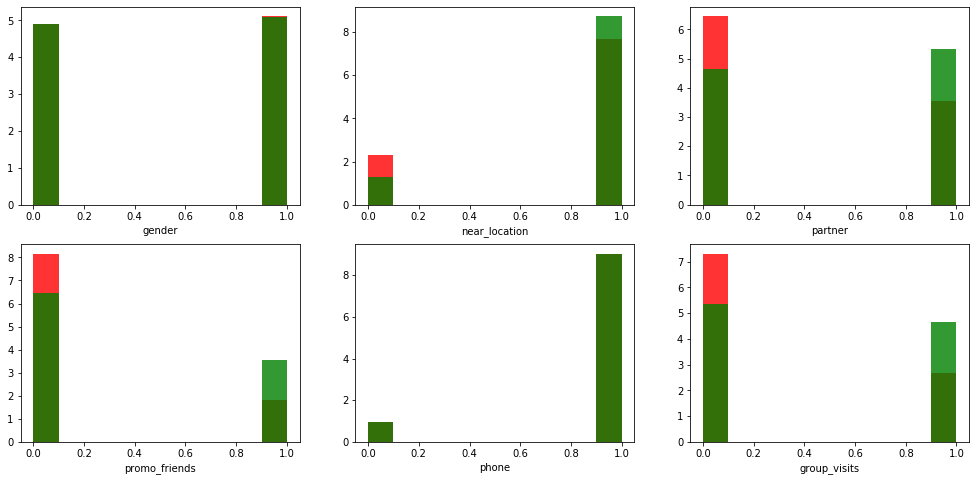

In [14]:
a = 0.8 # переменная для alpha
fig, axes = plt.subplots(2,3, figsize=(17, 8))
axes[0,0].hist(gym_churn[binary_features[0]], density=True, color='red', alpha=a)
axes[0,0].hist(gym_no_churn[binary_features[0]], density=True, color='green', alpha=a)
axes[0,0].set_xlabel(binary_features[0])

axes[0,1].hist(gym_churn[binary_features[1]], density=True,color='red', alpha=a)
axes[0,1].hist(gym_no_churn[binary_features[1]], density=True, color='green', alpha=a)
axes[0,1].set_xlabel(binary_features[1])

axes[0,2].hist(gym_churn[binary_features[2]], density=True,color='red', alpha=a)
axes[0,2].hist(gym_no_churn[binary_features[2]], density=True, color='green', alpha=a)
axes[0,2].set_xlabel(binary_features[2])

axes[1,0].hist(gym_churn[binary_features[3]], density=True,color='red', alpha=a)
axes[1,0].hist(gym_no_churn[binary_features[3]], density=True, color='green', alpha=a)
axes[1,0].set_xlabel(binary_features[3])

axes[1,1].hist(gym_churn[binary_features[4]], density=True,color='red', alpha=a)
axes[1,1].hist(gym_no_churn[binary_features[4]], density=True, color='green', alpha=a)
axes[1,1].set_xlabel(binary_features[4])

axes[1,2].hist(gym_churn[binary_features[5]], density=True,color='red', alpha=a)
axes[1,2].hist(gym_no_churn[binary_features[5]], density=True, color='green', alpha=a)
axes[1,2].set_xlabel(binary_features[5])
plt.show();

# Промежуточный вывод

Как и было отмечено ранее, пол не особо влияет на отток. Одинаково уходят как мужчини, так и женщины. Также покидают фитнес-центр чуть больше те, кто проживает не рядом и у кого нет партнерских отношений с центром. Кроме того, клиенты без друзей - реже посещающие групповые занятие, больше подвержены оттоку.

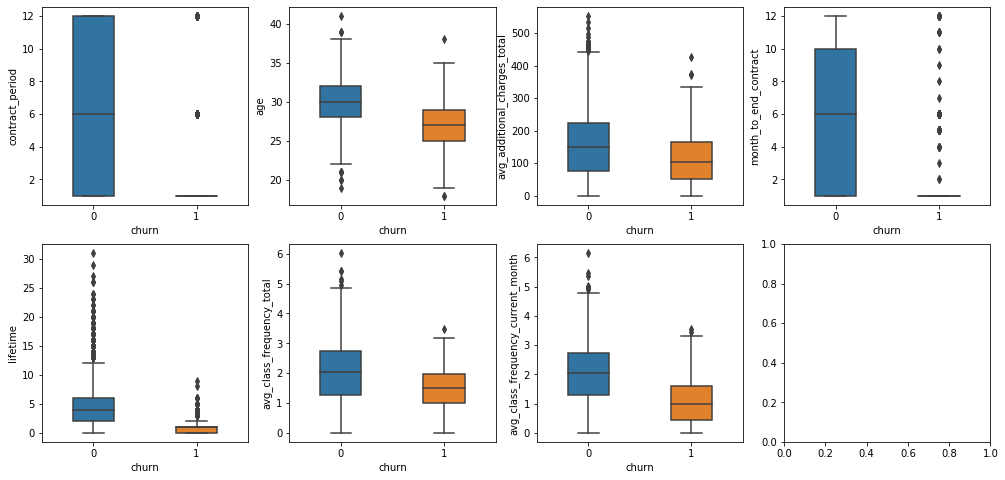

In [15]:
fig, axes = plt.subplots(2,4, figsize=(17, 8))
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[0], width=0.4, ax=axes[0,0])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[1], width=0.4, ax=axes[0,1])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[2], width=0.4, ax=axes[0,2])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[3], width=0.4, ax=axes[0,3])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[4], width=0.4, ax=axes[1,0])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[5], width=0.4, ax=axes[1,1])
ax = sns.boxplot(data = gym, x = 'churn', y=quantitive_features[6], width=0.4, ax=axes[1,2])

# Промежуточный вывод

По всем количественным признакам клиенты, которые остались имеют преимущество. Особенно выделается признак - длительность абонемента, с "длинными" абонементами уходят в отток меньше клиентов. Кроме того, чем больше времени до конца абонемента, тем меньше вероятность что клиент уйдет. Так же, выделяется срок жизни клиента, чем дольше клиент с нами, тем он лояльнее. Не замечено ни одного клиента, который покинул бы нас после 10 месяцев посещений.

### Построим матрицу корреляций и отобразите её
Далее построим матрицу корреляц, изучим взаимосвязи разных признаков.

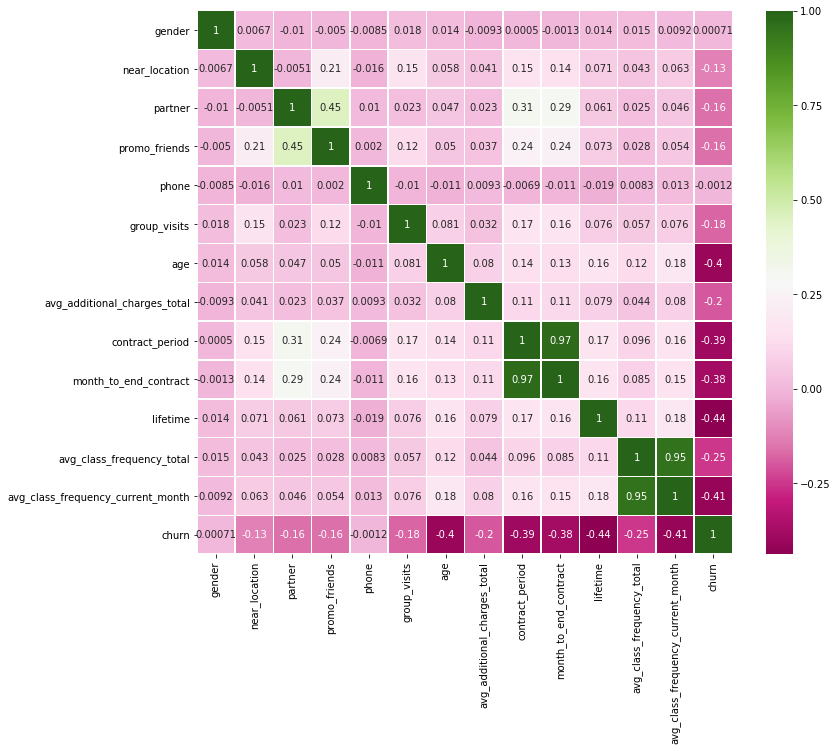

In [16]:
plt.subplots(figsize=(12, 10))
sns.heatmap(gym.corr(), annot=True, linewidths=0.5, cmap="PiYG");

*** Я построила специально две матрицы корреляции, чтобы узнать для себя -  в каком формате ее лучше представлять? Подскажите, пожалуйста)

# Промежуточный вывод

Как и было отмечено ранее, сильная корреляция наблюдается между посещяемостью фитнес-центра в текущем месяце и за все время. Кроме того, чрезвычайно сильная корреляция между сроком абонемента и количеством месяцев до его окончания, что не удивительно. Так же следует отметить, что средняя зависимость просматривается между признаком партнер и программой приведи друга. Вероятно клиенты по партнерской программе чащу зовут друзей/коллег в фитнес-центр.

In [17]:
gym = gym.drop(['avg_class_frequency_current_month', 'month_to_end_contract'], axis=1)

# Промежуточный вывод

Исходя из проделанного предварительного анализа признаков, можно сделать следующие выводы:

- Были выявлены предположительно самые мощные признаки влияющие на отток, такие как срок абонемента, время с момента первого обращения. 
- Отмечено, что в таблице присутствуют четыре сильно коррелирующих между собой признака, соответственно два можно и нужно будет не учитывать при будущем построении модели.

## Построим модель прогнозирования оттока клиентов
Приступи к построению модели бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце.Первым делом подготовим две переменные: с признаками и целевой переменной.

In [18]:
X = gym.drop('churn', axis=1)
y = gym['churn']

Теперь поделим выборку на обучающую и валидационную.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,  stratify = y)

Обучим две модели алгоритмами логистической регрессией и случайным лесом.

In [20]:
log_reg_model = LogisticRegression(random_state=0, max_iter=5000, solver='lbfgs')
log_reg_model.fit(x_train,y_train)
log_reg_predictions = log_reg_model.predict(x_test)

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

dec_tree_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
dec_tree_model.fit(x_train_st,y_train)
dec_tree_predictions = dec_tree_model.predict(x_test_st)

Изучим основные метрики.

In [22]:
print('Метрики LogisticRegression:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, log_reg_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, log_reg_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, log_reg_predictions)))
print('-------------------------------')
print('Метрики RandomForestClassifier:')
print('Accuracy - {:.2f}'.format(accuracy_score(y_test, dec_tree_predictions)))
print('Precision - {:.2f}'.format(precision_score(y_test, dec_tree_predictions)))
print('Recall - {:.2f}'.format(recall_score(y_test, dec_tree_predictions)))

Метрики LogisticRegression:
Accuracy - 0.91
Precision - 0.82
Recall - 0.83
-------------------------------
Метрики RandomForestClassifier:
Accuracy - 0.90
Precision - 0.83
Recall - 0.79


# Промежуточный вывод

Алгоритм логистической регрессии обощел по каждой из метрик случайный лес. Доля правильных ответов равна 90%, точность прогноза 78%, а полнота 81%. Регрессия выглядит лучше.

## Сделаем кластеризацию клиентов
### Стандартизация данных
После бинарной классификации перейдем к кластеризации. Прежде всего проведем стандартизацию всех параметров и преобразуем набор данных.

In [23]:
scaler = StandardScaler()
scaler.fit(X)

X_st = scaler.transform(X)

Сформируем таблицу связок.

In [24]:
linked = linkage(X_st, method = 'ward')

Построим дендограмму.

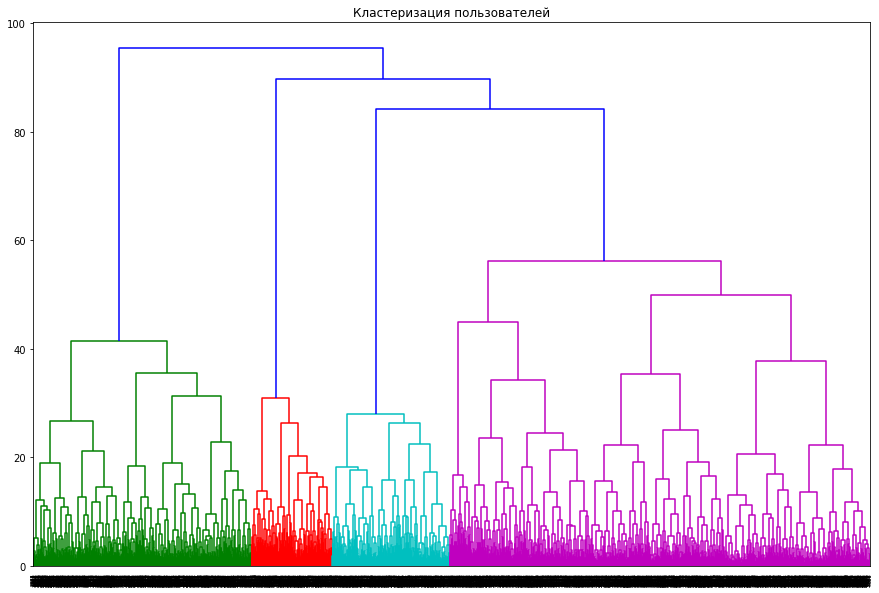

In [25]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация пользователей')
plt.show()

# Промежуточный вывод

Можно был бы провести воображаемую линию чуть ниже 40 и получить 9 кластеров! Однако для наших целей выберем число меньше, проведем линию чуть между 40 и 60 по вертикали и выделим 5 кластеров, так как линия пересечет вертикальные линии 5-и групп.

### Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов
Обучим модель на основании алгоритма K-Means.

In [26]:
km = KMeans(n_clusters = 5, random_state=0)
k_means_clusters = km.fit_predict(X_st)
# преоразуем в Series, чтобы затем объединить с основной таблицей
k_means_clusters = pd.Series(k_means_clusters, name='cluster')

In [27]:
gym_with_clusters = pd.concat([gym, k_means_clusters],axis=1)

Проверим.

In [28]:
gym_with_clusters.sample(5)

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,contract_period,lifetime,avg_class_frequency_total,churn,cluster
57,0,1,0,0,1,1,27,236.92,6,0,1.00,1,3
0,1,1,1,1,0,1,29,14.23,6,3,0.02,0,4
1670,1,1,1,1,1,1,26,293.30,6,1,3.98,0,1
530,0,0,1,0,1,0,25,230.17,1,0,1.93,1,0
2511,1,1,0,1,1,1,26,210.46,1,5,2.42,0,3


### Посмотрим на средние значения признаков для кластеров и построим графики распределения для признаков
Теперь можно изучить средние значения признаков для каждого из кластеров

In [29]:
gym_with_clusters.groupby('cluster').mean().sort_values(by='churn').T

cluster,1,3,4,2,0
gender,0.49,0.54,0.52,0.51,0.50
near_location,1.00,1.00,0.86,1.00,0.00
partner,0.96,0.25,0.47,0.24,0.49
promo_friends,0.89,0.08,0.31,0.06,0.08
phone,1.00,1.00,0.00,1.00,1.00
group_visits,0.46,1.00,0.43,0.00,0.24
age,29.54,29.54,29.30,28.77,28.72
avg_additional_charges_total,155.86,148.09,144.21,143.38,137.54
contract_period,7.66,4.53,4.78,2.82,3.03
lifetime,4.38,3.76,3.94,3.34,3.06


In [30]:
binary_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits','churn']
quantitive_features = ['contract_period', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total']

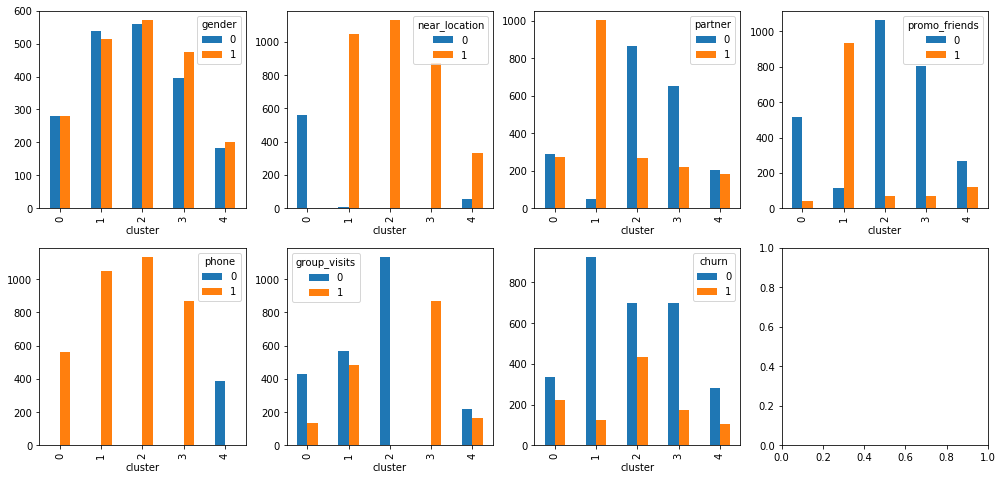

In [31]:
fig, axes = plt.subplots(2,4, figsize=(17, 8))
i = 0

for feature in binary_features:
    gym_with_clusters.groupby(['cluster', feature])[feature].count().unstack().plot.bar(ax=axes.flat[i])
    i += 1

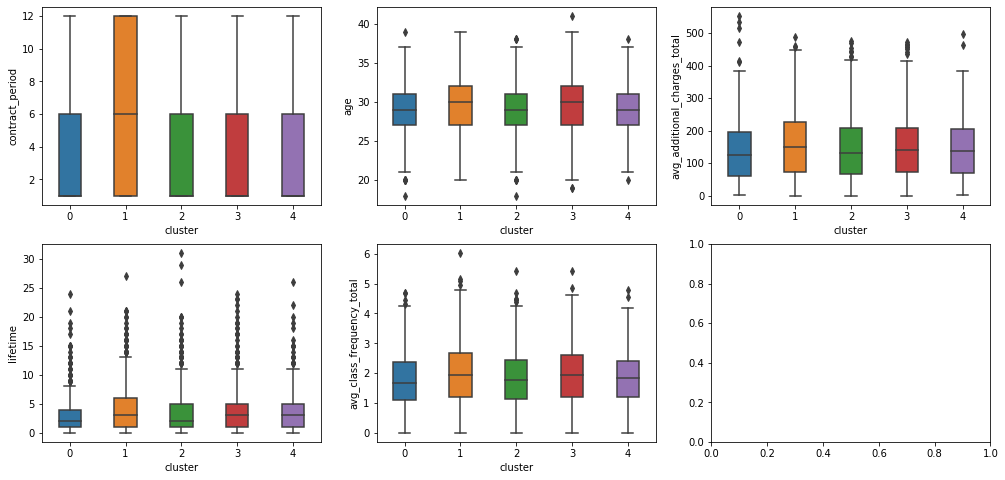

In [32]:
# строим сабплоты/ячейки для будущих графиков и задаем переменные: счетчик и координаты сабплота
fig, axes = plt.subplots(2,3, figsize=(17, 8))
counter = 0
ax_x = 0
ax_y = 0

for feature in quantitive_features:
    # заполняем первый ряд сабплота, если counter = 4, значит первый ряд заполнен и пора переходить ко второму
    if counter < 3:
        ax = sns.boxplot(data = gym_with_clusters, x = 'cluster', y = feature, width=0.4, ax=axes[ax_y, ax_x])
        ax_x += 1
        counter += 1

    else:
        ax_y = 1 # теперь строим все графики на втором ряду
        if ax_x == 3 and counter == 3: #обнуляем координаты по оси Х для первого графика на втором ряду
            ax_x = 0
        else:
            ax_x += 1 #во всех остальных случаях у нас будет +1 к кординатам по оси x
        ax = sns.boxplot(data = gym_with_clusters, x = 'cluster', y = feature, width=0.4, ax=axes[ax_y, ax_x])    
        counter += 1

<i class="a1">Кластер c минимальным оттоком (2%)</i>

- Все клиенты так или иначе находятся рядом с фитнес-центром, около трети имеют партнерские отношения с центром, почти все пришли без друзей. Длительность абонемента у этих клиентов около 6 месяцев как и "срок жизни".
- Эти клиенты чаще других посещают групповые занятия и в среднем тренеруются почти три раза в неделю. С этих клиентов центр имеет большее всего дополнительных доходов.

<i class="a1">Кластер с оттоком чуть выше минимального (12%)</i>

- Много клиентов находятся рядом с центром, и у многих имеются партнерские отношения с фитнесом, доля пришедших с друзьями - велика. 
- Средняя длительно контракта снижается.
- Около половины посещало групповые занятия. Дополнительный заработок фитнес центра, как и от первого класстера, значительный, по сравнению с прочими.
- Можно предположить, что в этой группе находятся клиенты, которые действительно заинтересованы в спорте.

<i class="a1">iКластер с оттоком около четверти от количества клиентов в группе (27%)</i>

- Находятся рядом с центром, чуть меньше половины имеют партнерские отношения и около трети пришли от друзей. Длительность абонемента, срок до конца и "срок жизни" примерно одинаковые, около 4,5.
- По остальным параметрам клиенты из группы особо не выделяются, можно сказать что в общем, они посещают фитнес реже, чем клиенты из предыдущих групп.
- Примечательно, почти никто не оставил телефон. Можно предположить, что это несамые спортивные клиенты, возможно только начинают заниматься.

<i class="a1">Кластер с оттоком чуть меньше половины (40%)</i>

- Почти никого нет рядом с фитнесом, контракт в среднем - 3 месяца, и слабая посещаемость групповых заняти.

<i class="a1">Лидер по оттоку - больше половины (55%)</i>

- Доля живущих не рядом с фиитнес-центром, больше чем в остальных группах. Приходят без друзей и имеют самые короткие абонементы и "срок жизни".
- Особенно выделяются на фоне прочих тем, что редко посещают центр.

## Общий вывод

Мы провели исследование как сеть фитнес-центров «Культурист-датасаентист» взаимодействует с клиентами. В результате проведеной проектной работы мной были рассмотрены данные файла и совершена предобработка. Данные были приведенны к правильному ввиду, проверены на наличие пропущенных  и дублирующих значений. Все данные представлены в удобном формате. На основании всего вышесказанного мы можем констатировать следующее:

- Особенно пристальное внимание нужно уделять продолжительности абонемента. Чем меньше продолжительность абонемента, тем больше вероятность, что это последний месяц когда клиент нас посещает. Наиболее безопасная длительность - 6 месяцев.
- Отдельно следует обращать внимание на помещаемость, как в целом, так и на посещение групповых занятий. Чем реже клиент посещает фитнес-центр, тем более вероятно что он уйдет. Не все ходят на групповые занятия, но в кластерах, где эта доля особенно низка, наблюдается больший процент отткой. 

Рекомендации для стратегии взаимодействия с клиентами и их удержания:

- Необходимо стимулировать клиентов, предлагать бонусы, скидки и т.п., чтобы они оформляли абонемент на 6 месяцев.
- Для удержания клиентов можно рекомендовать "заманивать" клиентов на тренировки и групповые занятия, предлагаю бесплатные пробные, устраивая мастер-классы и иное.